In [3]:
import scvelo as scv
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import anndata as ad
import scvelo as scv

In [2]:
adata = ad.read_h5ad("/home/users/kzlin/kzlinlab/projects/veloUncertainty/out/kevin/Writeup9/Writeup9_unitvelo_larry.h5ad")
adata

AnnData object with n_obs × n_vars = 49302 × 1042
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'velocity_gamma', 'velocity_r2', 'scaling', 'velocity_genes', 'fit_vars', 'fit_varu', 'fit_gamma', 'fit_beta', 'fit_offset', 'fit_a', 'fit_t', 'fit_h', 'fit_intercept', 'fit_loss', 'fit_llf', 'fit_sr2', 'fit_ur2'
    uns: 'base_function', 'basis', 'data_des', 'datapath', 'hvg', 'label', 'log1p', 'loss', 'neighbors', 'par_names', 'pca', 'temp', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_clone', 'X_emb', 'X_pca', 'velocity_pca'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'Mu_scale', 'ambig

In [4]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40) # used to be n_neighbors=10
sc.tl.umap(adata)
scv.tl.velocity_graph(adata)

computing moments based on connectivities
    finished (0:00:04) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


2024-08-21 21:23:38.167769: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 21:23:39.432728: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 21:23:40.312244: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 21:23:40.830966: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 21:23:40.997815: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-21 21:23:42.238019: I tensorflow/core/platform/cpu_feature_gu

computing velocity graph (using 1/20 cores)


  0%|          | 0/49302 [00:00<?, ?cells/s]

    finished (0:01:54) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:12) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


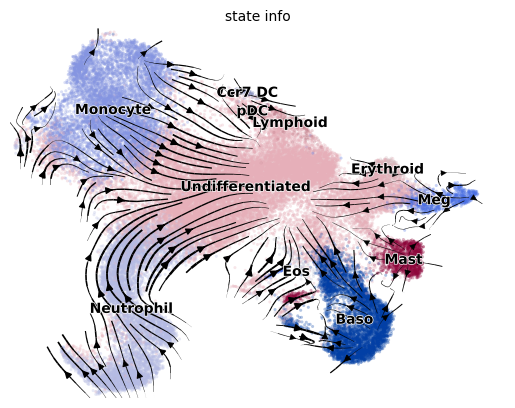

In [5]:
celltype_label = 'state_info'
scv.pl.velocity_embedding_stream(adata, 
                                 basis='umap',
                                 color=celltype_label,
                                 recompute=True)